# Module 2
# Data visualization and Technical Analysis


# Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.

Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
from datetime import datetime
from functools import partial

data = pd.read_csv("week1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 21 columns):
Unnamed: 0                494 non-null int64
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null object
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
Month                     494 non-null int64
Year                      494 non-null int64
VWAP                      494 non-null float64
Day_Perc_Change  

In [2]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtype

dtype('<M8[ns]')

In [3]:
data.set_index('Date', inplace = True)
data.head(2)

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,MINDTREE,EQ,510.60,507.35,515.00,505.9,510.5,509.45,510.39,271952,138800509.8,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.0,511.0,511.30,512.69,207011,106131728.2,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change


In [4]:
import matplotlib.pyplot as plt

data['Close Price'].plot(label = 'MINDTREE',figsize=(16,8),title='Closing Price with respect to Date')
plt.legend()

In [5]:
data['Close Price'].diff().abs().sort_values(ascending = False).fillna(0)

Date
2018-10-19    164.05
2018-07-19     90.65
2018-04-20     82.25
2018-02-23     71.20
2018-10-31     64.70
2018-08-31     62.65
2018-01-18     59.30
2018-01-22     54.95
2018-11-28     50.65
2018-03-05     45.50
2018-03-15     44.10
2018-10-08     42.30
2019-01-22     39.35
2018-10-01     38.55
2018-04-02     38.25
2017-11-27     37.60
2018-04-26     36.90
2018-08-27     36.75
2018-06-14     36.00
2019-01-29     35.00
2018-09-21     34.15
2017-05-25     33.95
2018-06-29     33.90
2018-04-30     33.90
2018-04-25     33.75
2018-03-06     33.45
2018-09-05     32.95
2018-03-19     32.95
2018-05-02     32.95
2018-04-19     32.50
               ...  
2018-05-30      0.60
2019-05-08      0.55
2017-07-13      0.55
2017-09-19      0.50
2017-11-10      0.50
2019-02-14      0.50
2019-02-26      0.50
2019-04-01      0.45
2017-10-09      0.40
2017-11-09      0.40
2017-11-21      0.40
2018-12-31      0.40
2018-06-07      0.40
2018-07-17      0.35
2019-04-04      0.30
2017-06-30      0.30
2017-12-

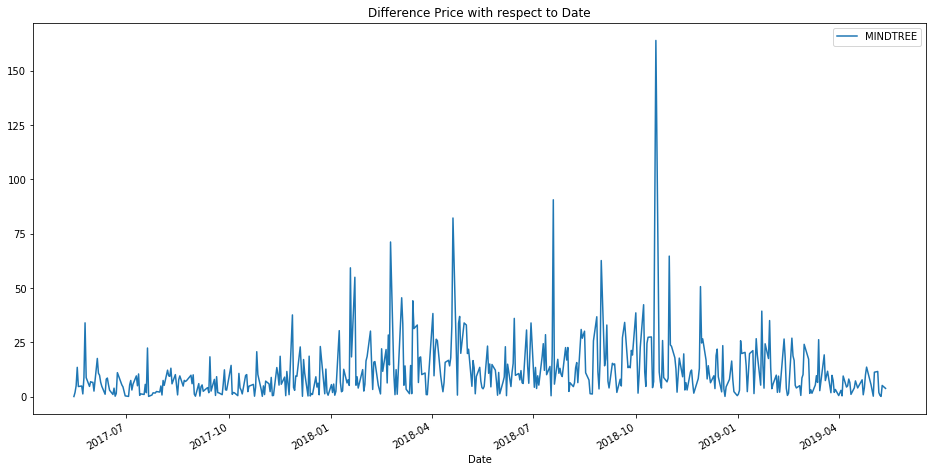

In [6]:
data['Close Price'].diff().abs().sort_values(ascending = False).fillna(0).plot(label = 'MINDTREE',figsize=(16,8),title='Difference Price with respect to Date')
plt.legend()

bs4 — BeautifulSoup 4.

Beautiful Soup is a Python library for pulling data out of HTML and XML files. 

It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree.

In [7]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')

print("Printing news for only 4 dates")
print("Obtaining news from Money Control")
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_04_20")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

Printing news for only 4 dates
Obtaining news from Money Control
News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which was offset by negative impact of p

# Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

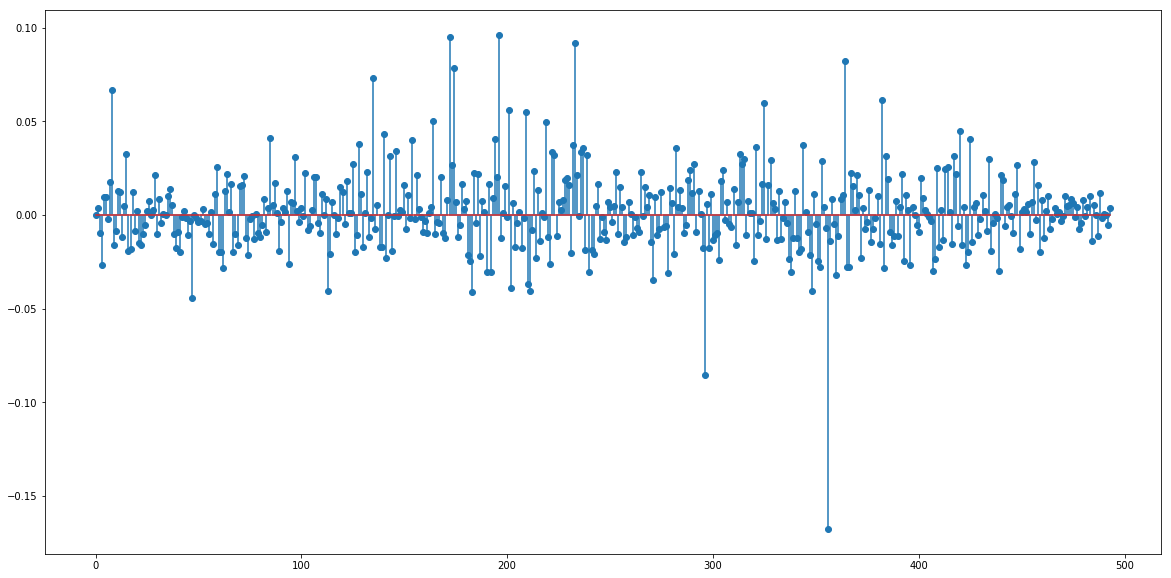

In [8]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'])

# Query 2.3 
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

In [9]:
data.head(2)

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,MINDTREE,EQ,510.60,507.35,515.00,505.9,510.5,509.45,510.39,271952,138800509.8,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.0,511.0,511.30,512.69,207011,106131728.2,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change


The Axes.twinx() function in axes module of matplotlib library is used to create a twin Axes sharing the xaxis.

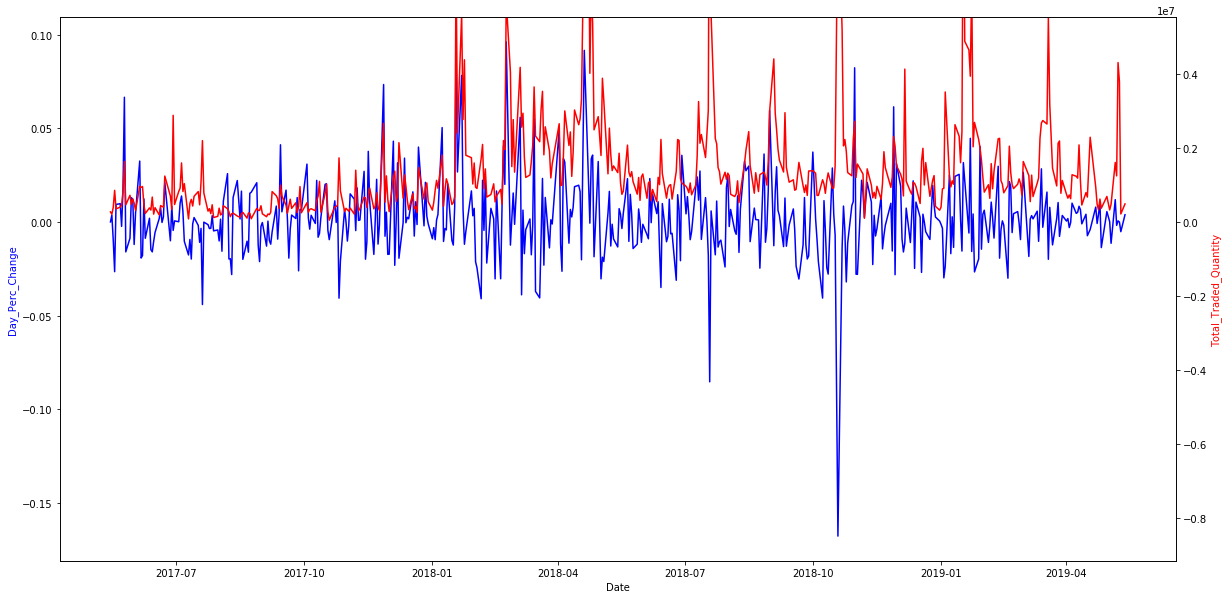

In [10]:
import matplotlib.pyplot as pyplot

fig = pyplot.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_xlabel('Date')

ax2.set_ylabel('Total_Traded_Quantity', color='red')
ax2.plot(data['Total Traded Quantity'], 'r-')

ax1.plot(data['Day_Perc_Change'], 'b-')
ax1.set_ylabel('Day_Perc_Change', color='blue')

def align_yaxis(ax1, v1, ax2, v2):
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    
align_yaxis(ax1, 0, ax2, 0)

<StemContainer object of 3 artists>

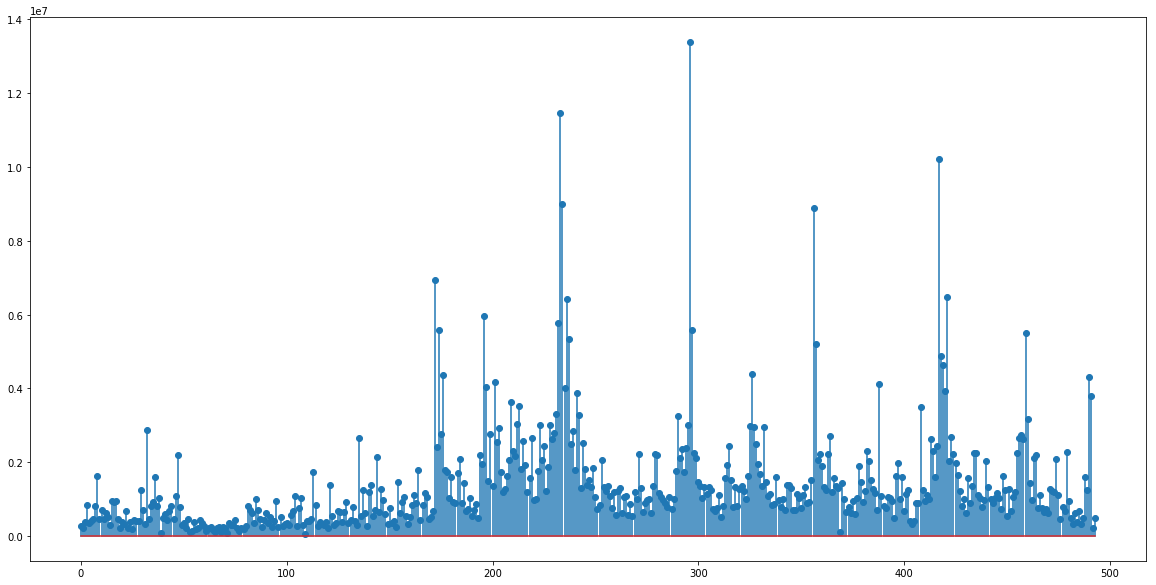

In [11]:
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'])

<StemContainer object of 3 artists>

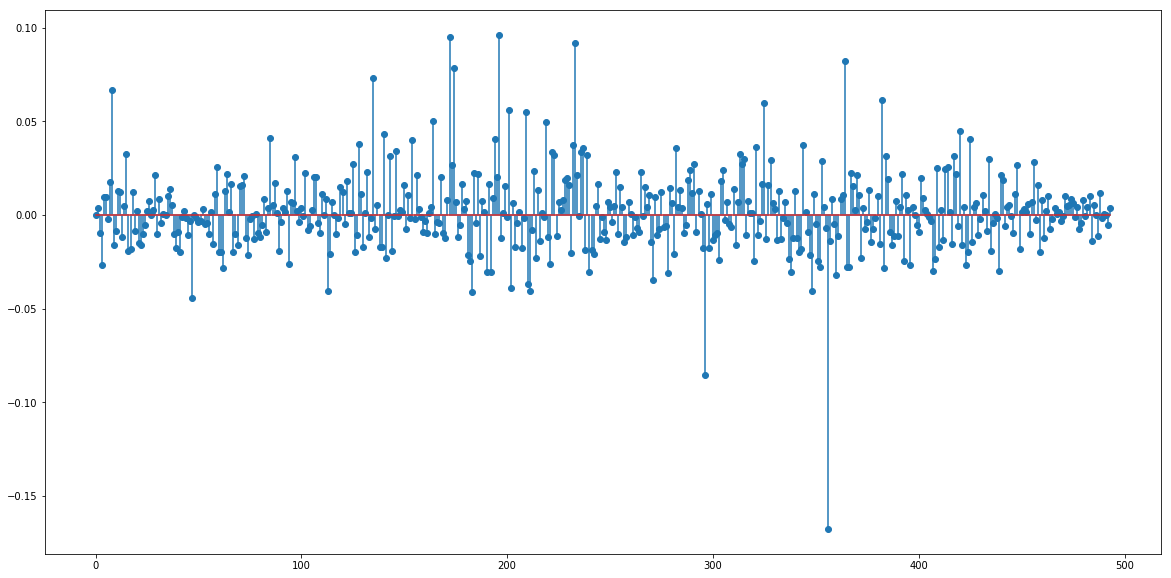

In [12]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'])

## Documentation:-
#### Analysis: The positive hills of Day_Perc_Change vs Date plot matches slightly with the Total Traded Quantity vs Date plot.
#### Inference: It implies that whenever the positive daily percentages increases our total traded quantity also rises by somewhat the same amount.
#### And since the daily changing percentage depends upon the closing prices of each day hence closing prices play a major in the increase of the total traded quantity

# Query 2.4 
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

Since I only have 1 trend so there will be only 1 color pie chart 

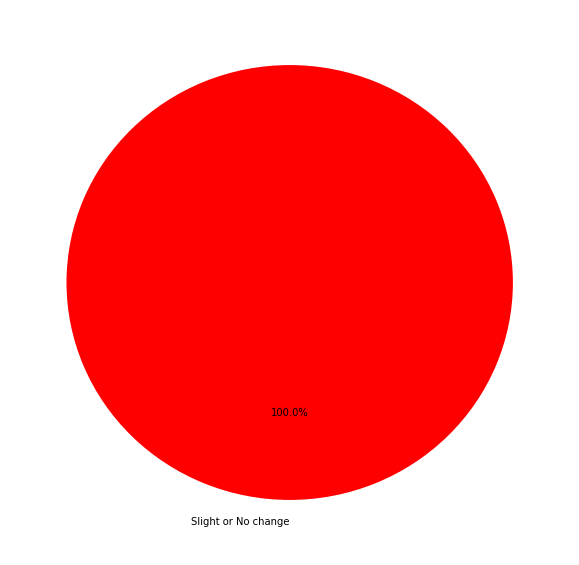

In [14]:
counter = [494]
labels= ['Slight or No change']
colors = ['r']
plt.figure(figsize=(10,10))
plt.pie(counter, labels=labels , colors=colors , startangle=90 , autopct='%.1f%%')
plt.show()

In [15]:
# We will find the average of each trend type
# here we only have 1 trend which is Slight or No change hence only 1 bar graph
gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,1.388615e+06,1.450169e+06,46300.0,572476.25,1006586.5,1631997.25,13385207.0


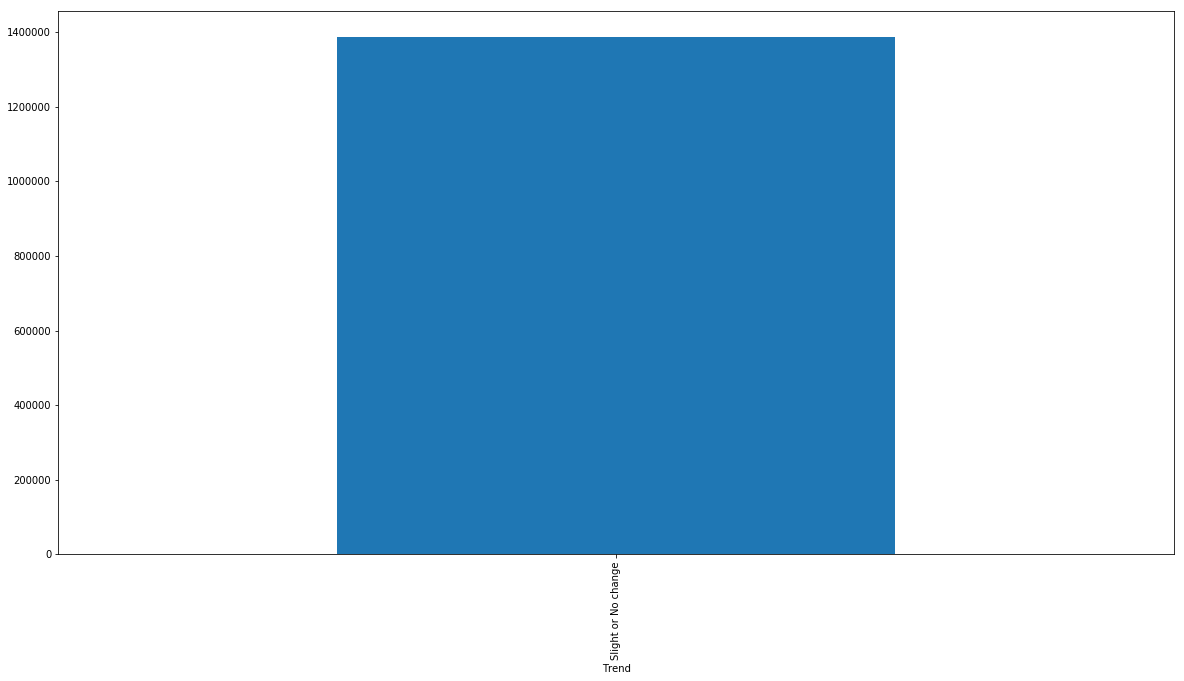

In [16]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

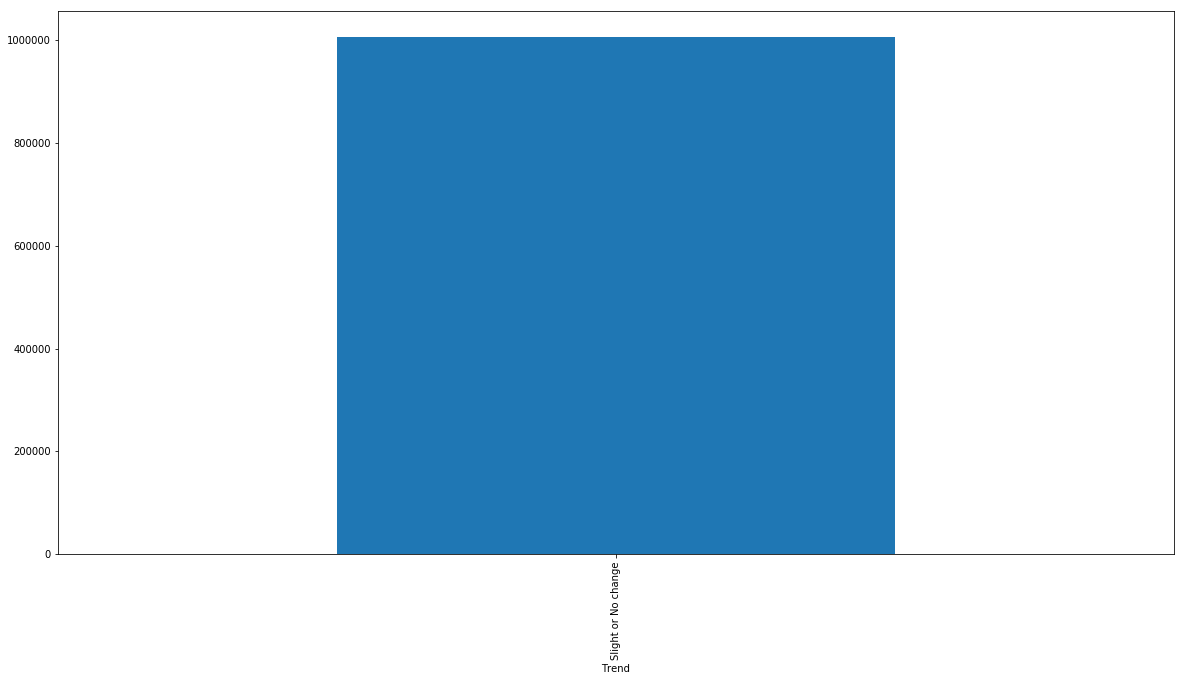

In [17]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# Query 2.5 
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

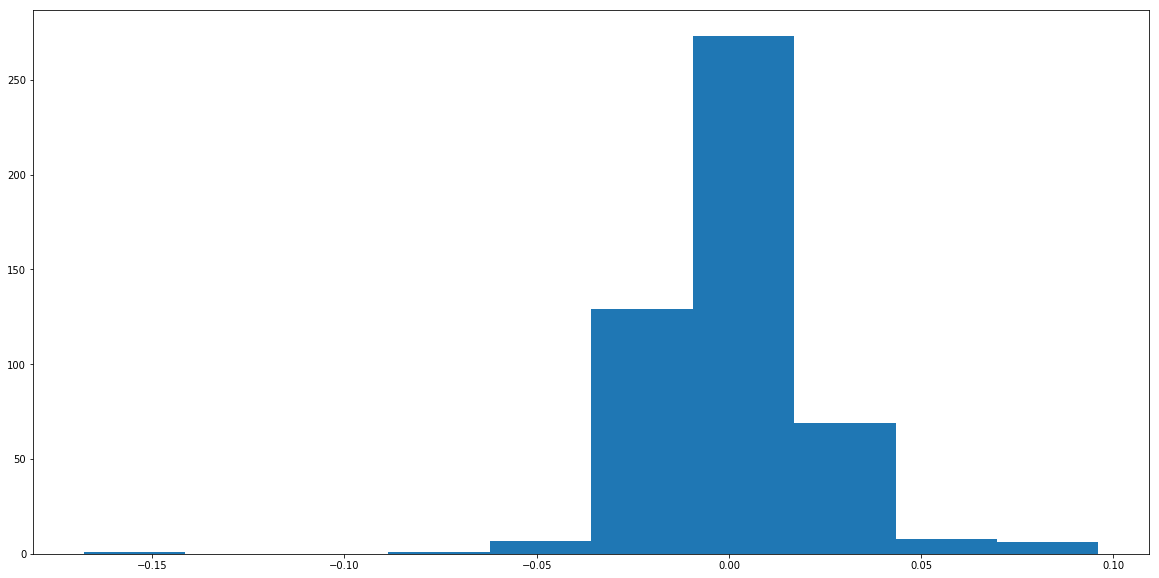

In [18]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

# Query 2.6 
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [19]:
import pandas as pd
wipro_data = pd.read_csv('wipro_stock_data.csv')
tcs_data = pd.read_csv('tcs_stock_data.csv')
itc_data = pd.read_csv('itc_stock_data.csv')
cub_data = pd.read_csv('cub_stock_data.csv')
airtel_data = pd.read_csv('airtel_stock_data.csv')

In [20]:
wipro_data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,06-Jul-2017,257.80,257.8,260.05,255.85,256.5,257.75,258.02,1649570,4.256266e+08,16693,965007,58.50
1,WIPRO,EQ,07-Jul-2017,257.75,255.1,258.25,255.00,257.1,257.70,257.36,1458678,3.754085e+08,19295,957019,65.61


In [21]:
tcs_data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,06-Jul-2017,2356.00,2359.0,2361.90,2340.1,2350.05,2347.55,2348.75,513394,1.205835e+09,26826,342973,66.81
1,TCS,EQ,07-Jul-2017,2347.55,2350.0,2356.45,2325.5,2332.00,2331.95,2343.49,616045,1.443698e+09,52731,417958,67.85


In [22]:
itc_data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,06-Jul-2017,331.05,334.3,338.75,331.30,337.1,337.1,336.17,13429462,4.514575e+09,122886,8156576,60.74
1,ITC,EQ,07-Jul-2017,337.10,338.0,338.20,333.05,334.5,334.3,334.92,9919790,3.322371e+09,91378,6752966,68.08


In [23]:
cub_data.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,CUB,EQ,06-Jul-2017,179.6,179.25,181.00,178.8,180.1,180.00,180.04,513327,92419084.95,4265,457813,89.19
1,CUB,EQ,07-Jul-2017,180.0,182.00,182.75,179.4,182.2,181.55,181.40,150843,27363238.10,2074,88526,58.69


In [24]:
airtel_data .head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,06-Jul-2017,376.3,376.55,382.85,373.95,381.20,381.3,379.89,2162556,8.215367e+08,28573,1129739,52.24
1,BHARTIARTL,EQ,07-Jul-2017,381.3,384.00,387.55,383.00,387.55,385.9,385.28,4371065,1.684069e+09,37883,3261760,74.62


In [25]:
filter_wipro = wipro_data[wipro_data.Series == 'EQ']

In [26]:
filter_tcs = tcs_data[tcs_data.Series == 'EQ']

In [27]:
filter_itc = itc_data[itc_data.Series == 'EQ']

In [28]:
filter_cub = cub_data[cub_data.Series == 'EQ']

In [29]:
filter_airtel = airtel_data[airtel_data.Series == 'EQ']

In [30]:
import pandas as pd

columns = ['Wipro','TCS','ITC','CUB','Airtel']
close_prices_dataFrame = pd.DataFrame(columns = columns)

close_prices_dataFrame['Wipro'] = filter_wipro['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame['ITC'] = filter_itc['Close Price']
close_prices_dataFrame['CUB'] = filter_cub['Close Price']
close_prices_dataFrame['Airtel'] = filter_airtel['Close Price']
close_prices_dataFrame.dropna().head(2)

,Wipro,TCS,ITC,CUB,Airtel
0,257.75,2347.55,337.1,180.00,381.3
1,257.70,2331.95,334.3,181.55,385.9


In [31]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna().head(2)

,Wipro,TCS,ITC,CUB,Airtel
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000194,-0.006645,-0.008306,0.008611,0.012064


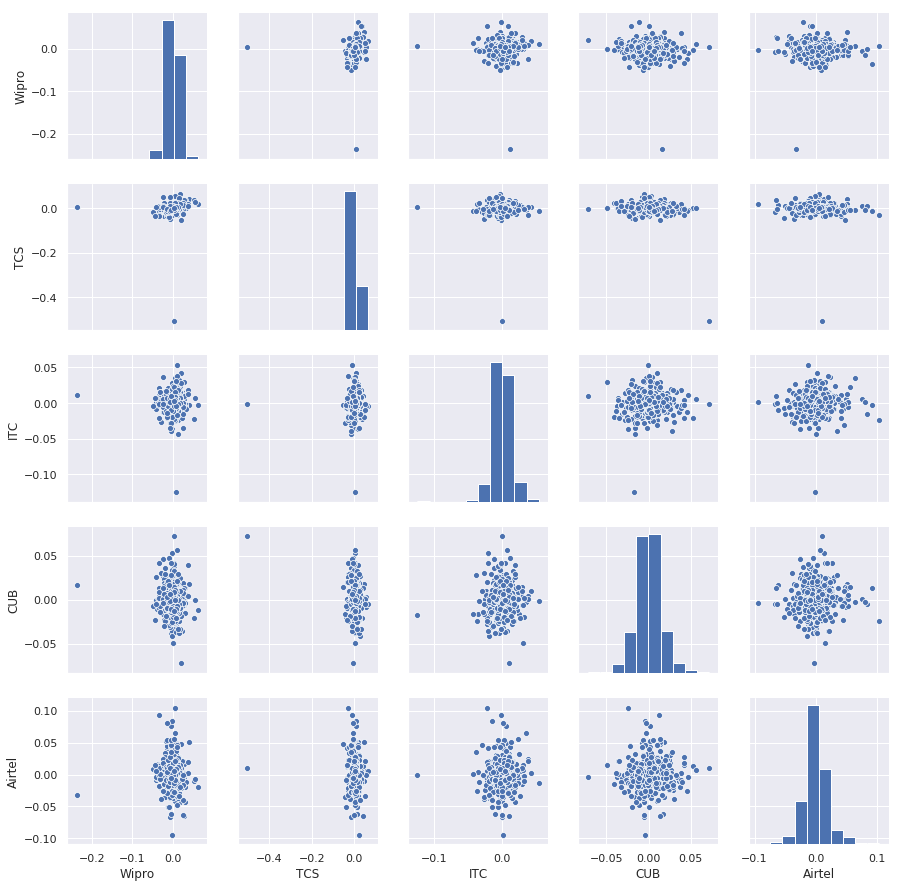

In [32]:
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)

# Query 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time.

Do give the following documentation on volatility a read.You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [33]:
rolling_avg_wipro = pct_change_dataFrame['Wipro'].rolling(7).mean().fillna(0)
rolling_avg_wipro

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.001320
7      0.005168
8      0.006347
9      0.001614
10     0.003276
11     0.011920
12     0.014532
13     0.015824
14     0.011877
15     0.010899
16     0.009463
17     0.010194
18     0.004369
19     0.001137
20    -0.000168
21     0.000079
22    -0.000908
23    -0.000762
24    -0.000912
25    -0.003235
26    -0.001982
27    -0.000288
28     0.000282
29     0.000308
         ...   
465   -0.000008
466   -0.002407
467   -0.001685
468   -0.002217
469    0.000582
470    0.001681
471    0.004579
472    0.005426
473    0.005544
474    0.006036
475    0.005640
476    0.004779
477    0.005716
478    0.003464
479    0.002454
480    0.003715
481    0.001426
482   -0.001460
483   -0.005198
484   -0.005889
485   -0.007055
486   -0.006542
487   -0.006284
488   -0.007757
489   -0.006674
490   -0.002460
491   -0.000773
492   -0.000502
493   -0.000701
494   -0.007166
Name: Wipro, Length: 495

In [34]:
stand_wipro = rolling_avg_wipro.fillna(0).std()
stand_wipro

0.007472522152842465

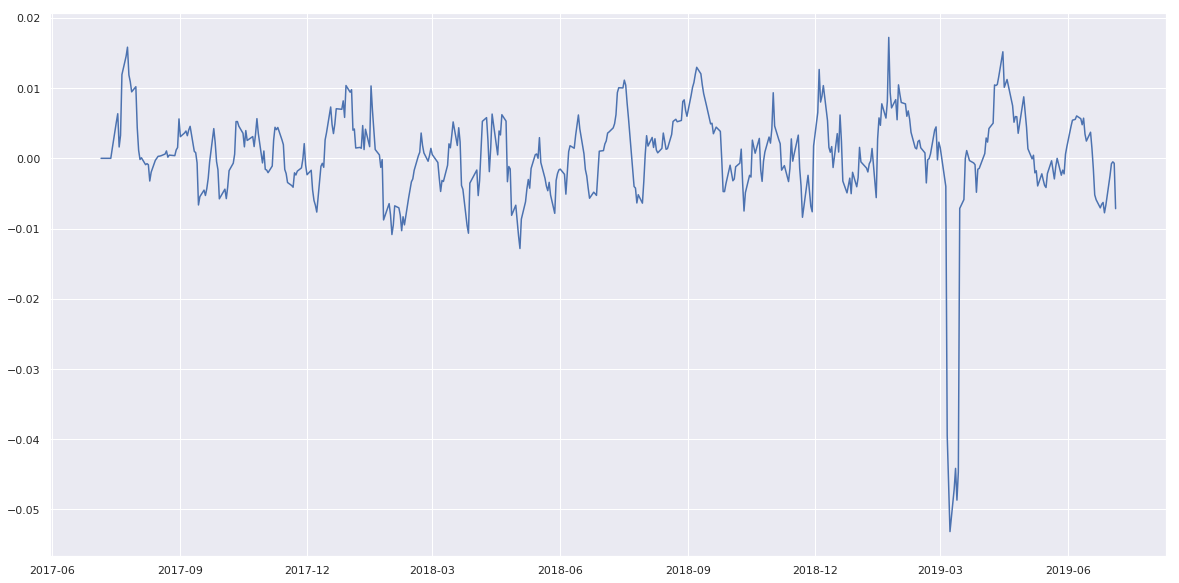

In [35]:
crrDate = pd.to_datetime(filter_wipro['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_wipro.fillna(0).tolist())
plt.show()

# Query 2.8 
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [36]:
nif_load = pd.read_csv('Nifty50.csv')
nif_load.head(2)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89


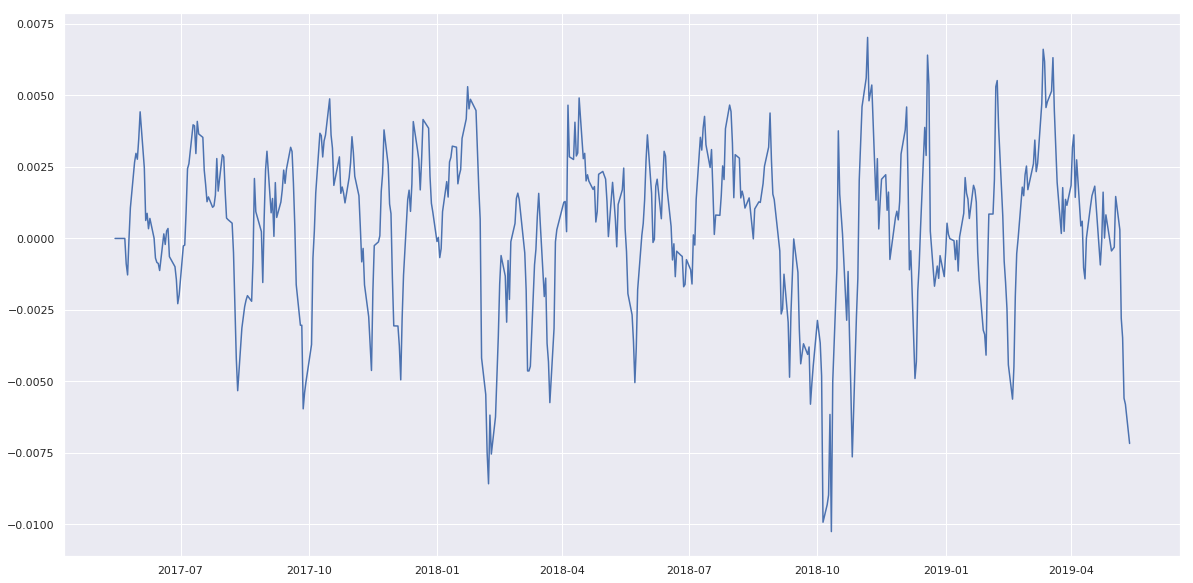

In [37]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifLis = nifDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(nifLis,nif_change.fillna(0).tolist())

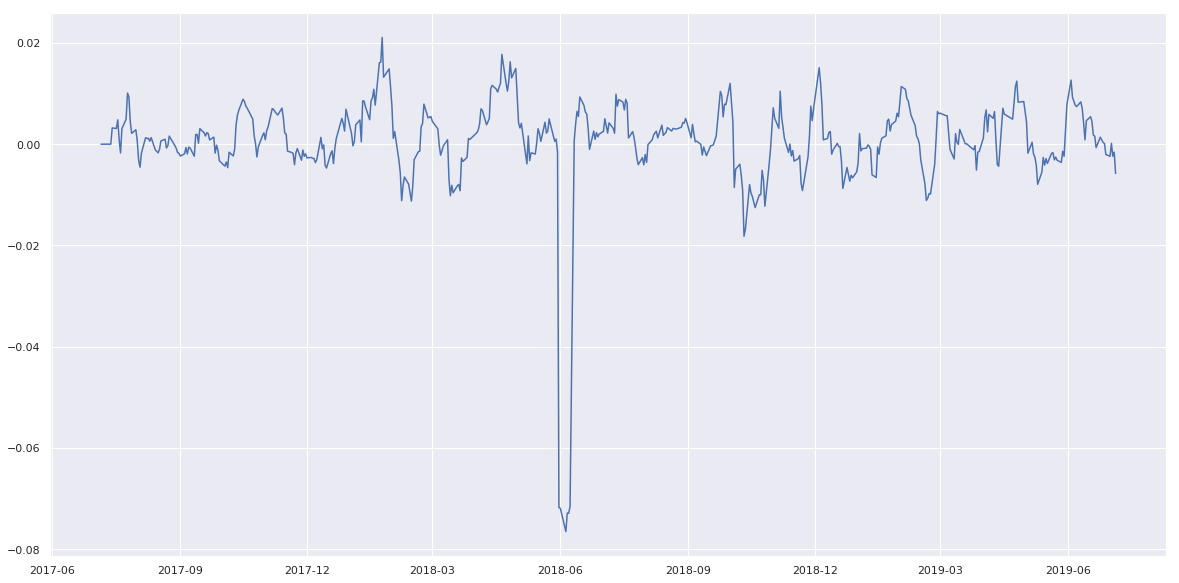

In [38]:
tcs_close_price = filter_tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
tcs_Date = pd.to_datetime(filter_tcs['Date'])
tcsLis = tcs_Date.tolist()
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change.fillna(0).tolist())

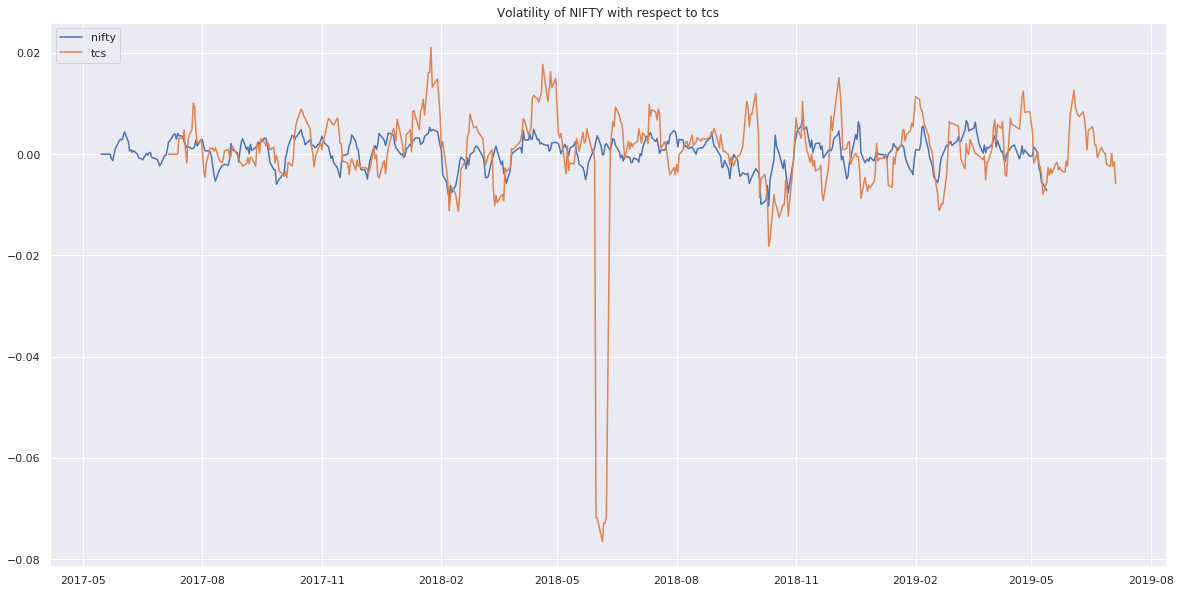

In [39]:
plt.figure(figsize=(20,10))
plt.title("Volatility of NIFTY with respect to tcs")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')

# Query 2.9 
Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

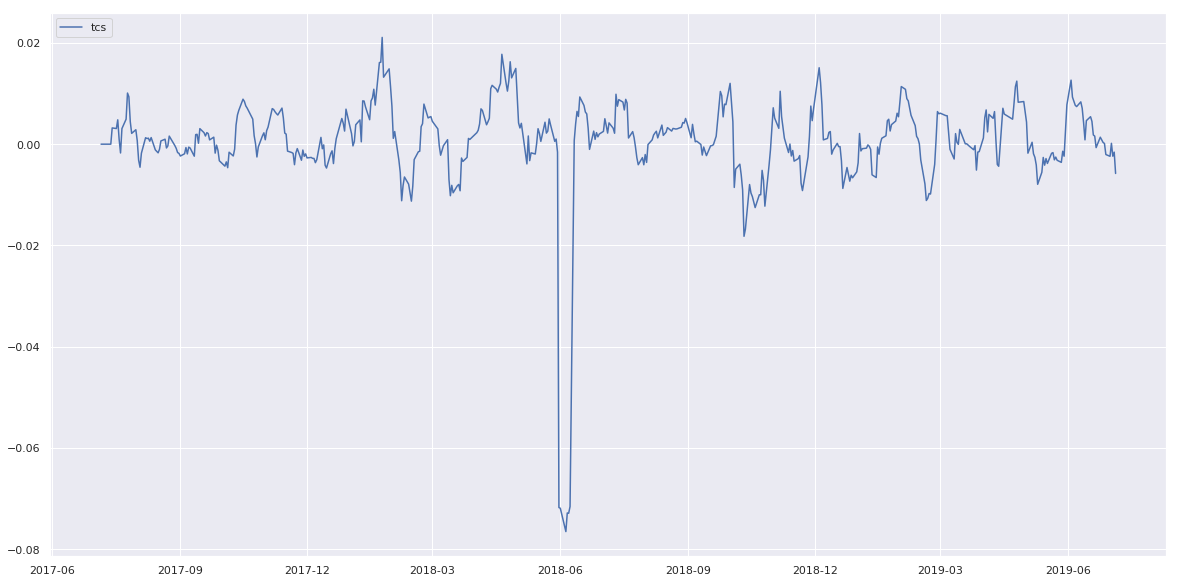

In [40]:
# I will use tcs stocks for applying buy/sell signals
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [41]:
import numpy as np
#making short and long signals
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_tcs.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = filter_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = filter_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

#Generate trading orders
signals['positions'] = signals['signal'].diff().fillna(0)
print(signals)

     signal   short_mavg    long_mavg  positions
0       0.0  2347.550000  2347.550000        0.0
1       0.0  2339.750000  2339.750000        0.0
2       0.0  2371.483333  2371.483333        0.0
3       0.0  2397.562500  2397.562500        0.0
4       0.0  2405.940000  2405.940000        0.0
5       0.0  2412.683333  2412.683333        0.0
6       0.0  2410.507143  2410.507143        0.0
7       0.0  2408.625000  2408.625000        0.0
8       0.0  2408.594444  2408.594444        0.0
9       0.0  2412.695000  2412.695000        0.0
10      0.0  2415.604545  2415.604545        0.0
11      0.0  2421.904167  2421.904167        0.0
12      0.0  2430.273077  2430.273077        0.0
13      0.0  2440.360714  2440.360714        0.0
14      0.0  2448.070000  2448.070000        0.0
15      0.0  2450.171875  2450.171875        0.0
16      0.0  2452.179412  2452.179412        0.0
17      0.0  2454.380556  2454.380556        0.0
18      0.0  2456.868421  2456.868421        0.0
19      0.0  2457.71

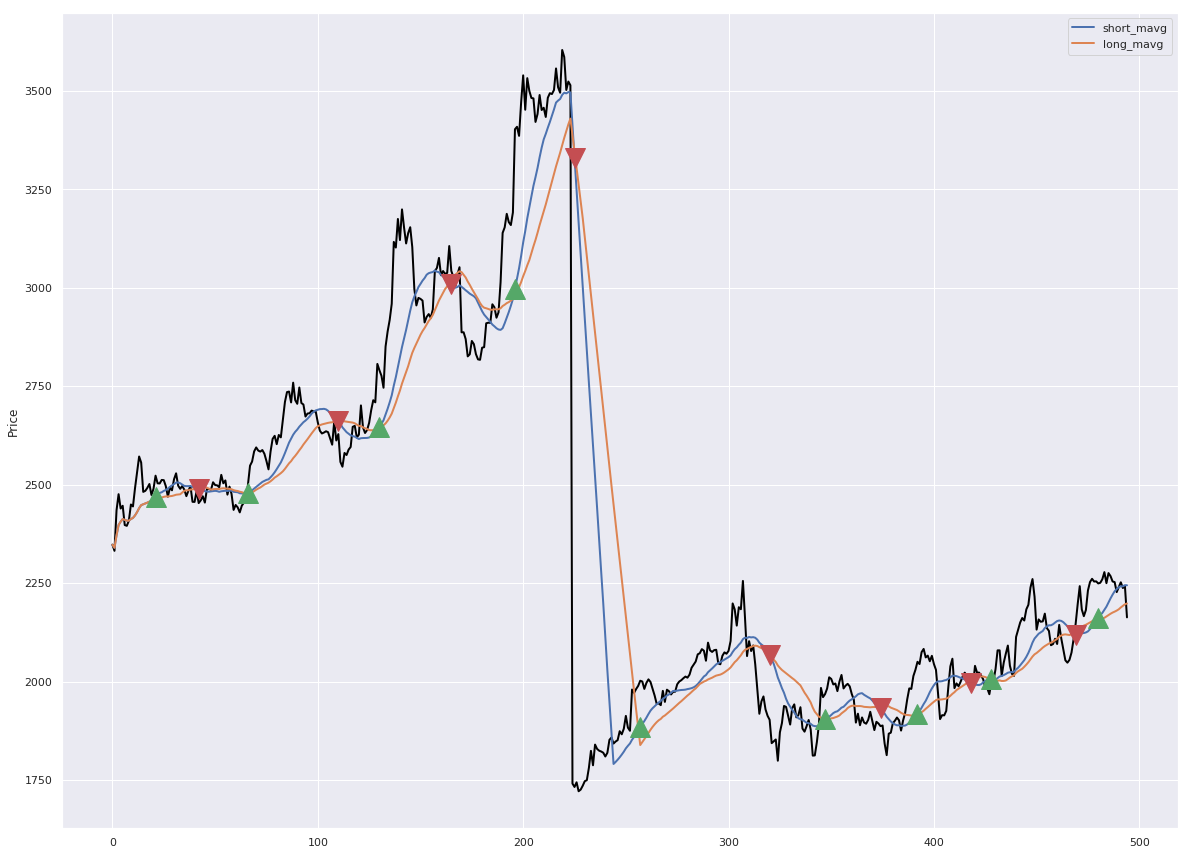

In [42]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

# 2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

Bollinger Bands are a trading tool used to determine entry and exit points for a trade.

The bands are often used to determine overbought and oversold conditions.

Using only the bands to trade is a risky strategy since the indicator focuses on price and volatility, while ignoring a lot of other relevant information.

Bollinger Bands are a rather simple trading tool, and are incredibly popular with both professional and at-home traders.

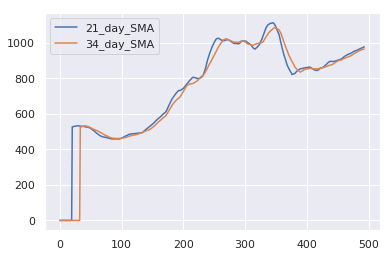

In [43]:
df = pd.read_csv('week1.csv',index_col = 0)
df['Date'] = df.Date.astype('datetime64')

df["21_day_SMA"] = df['Close Price'].rolling(21).mean().fillna(0)
df["34_day_SMA"] = df['Close Price'].rolling(34).mean().fillna(0)
df[["21_day_SMA", "34_day_SMA"]].plot()
plt.show()

In [44]:
df.set_index('Date', inplace= True)
prev_index = df.index[0]
prev_row = df[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
df['Trade_Call'] = 'HODL'

In [45]:
for index, row in df.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        df.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
req = df[["Close Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][df['Trade_Call'] != "HODL" ]
req

,Close Price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-06-30,529.00,531.047619,525.704412,BUY
2017-07-07,539.15,529.659524,530.754412,SELL
2017-10-06,480.05,463.140476,462.683824,BUY
2018-04-12,836.40,800.766667,802.697059,SELL
2018-04-20,979.85,826.373810,821.758824,BUY
2018-06-06,1013.80,1012.542857,1015.311765,SELL
2018-06-18,991.90,1016.521429,1015.808824,BUY
2018-06-21,989.85,1011.183333,1012.183824,SELL
2018-07-18,1061.80,1012.523810,1011.557353,BUY


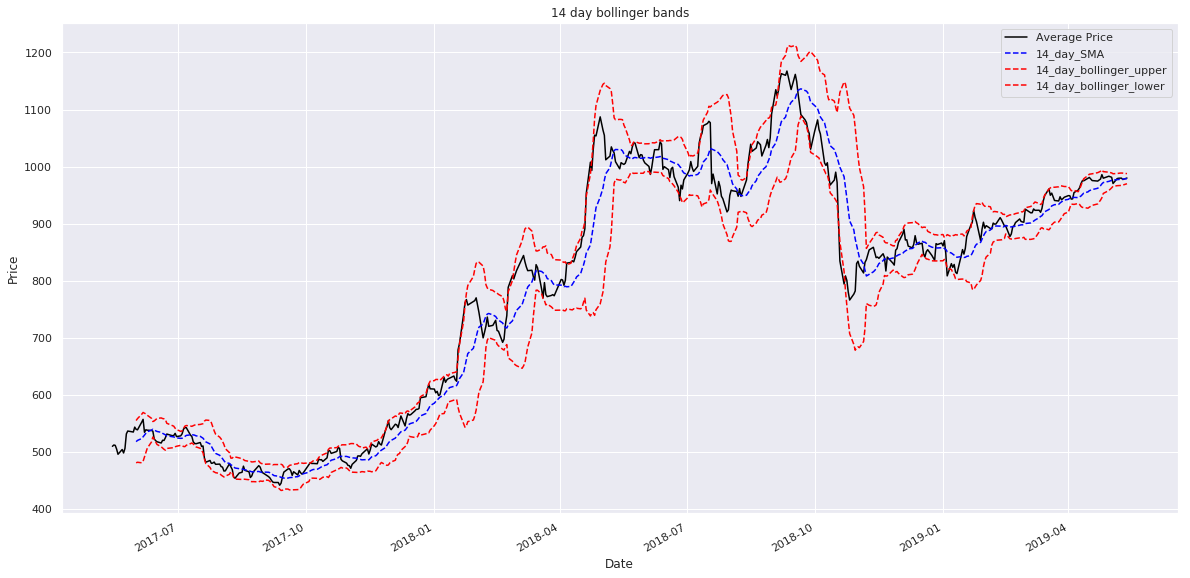

In [46]:
fig = plt.figure(figsize=(20,10))

df["14_day_SMA"] = df['Close Price'].rolling(14).mean()
df["14_day_STD"] = df['Close Price'].rolling(14).std()
df["14_day_bollinger_upper"] = df["14_day_SMA"] + df["14_day_STD"] * 2
df["14_day_bollinger_lower"] = df["14_day_SMA"] - df["14_day_STD"] * 2
df.reset_index(inplace=True)

ax = plt.gca()

df.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
df.plot(kind='line',x='Date', y='14_day_SMA', ax=ax, color='blue', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_upper', ax=ax, color='red', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_lower', ax=ax, color='red', linestyle='--')


plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [49]:
data.head(2)

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,MINDTREE,EQ,510.60,507.35,515.00,505.9,510.5,509.45,510.39,271952,138800509.8,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.0,511.0,511.30,512.69,207011,106131728.2,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change


In [48]:
data.to_csv('week3.csv')